# Programación declarativa @ URJC
# Programación funcional
## Curso 23-24, convocatoria ordinaria (19 de junio de 2024)


# Preámbulo

In [1]:
import $ivy.`org.scalatest::scalatest:3.0.8`
import org.scalatest._

import $ivy.$                               

import org.scalatest._

### Algunas definiciones de tipos y funciones auxiliares

In [ ]:
object Signatures{
    abstract class List[A]{
        
        // Common HOFs
        def foldRight[B](nil: B)(cons: (A, B) => B): B
        def foldLeft[B](initial: B)(update: (B, A) => B): B
        def map[B](f: A => B): List[B]
        def flatMap[B](f: A => List[B]): List[B]
        def filter(f: A => Boolean): List[A]
        def forall(pred: A => Boolean): Boolean
        def exists(pred: A => Boolean): Boolean
 
        // Returns the number of elements of this list
        def length: Int
        def reverse: List[A]
    }
}

In [21]:
// Devuelve los restos de la lista de entrada: 
// tails(List(1,2,3,4)) == List(List(2,3,4), List(3,4), List(4), List())

def tails[A](l: List[A]): List[List[A]] = 
    l match {
        case Nil => Nil
        case h :: t => t :: tails(t)
    }

defined function tails

### Definiciones auxiliares sobre la correspondencia Curry-Howard y Tipos Algebraicos de Datos

In [ ]:
trait Isomorphic[A, B]{
    
    def from(a: A): B
    
    def to(b: B): A
    
    def law1(a: A): Boolean = 
        to(from(a)) == a
    
    def law2(b: B): Boolean = 
        from(to(b)) == b
}

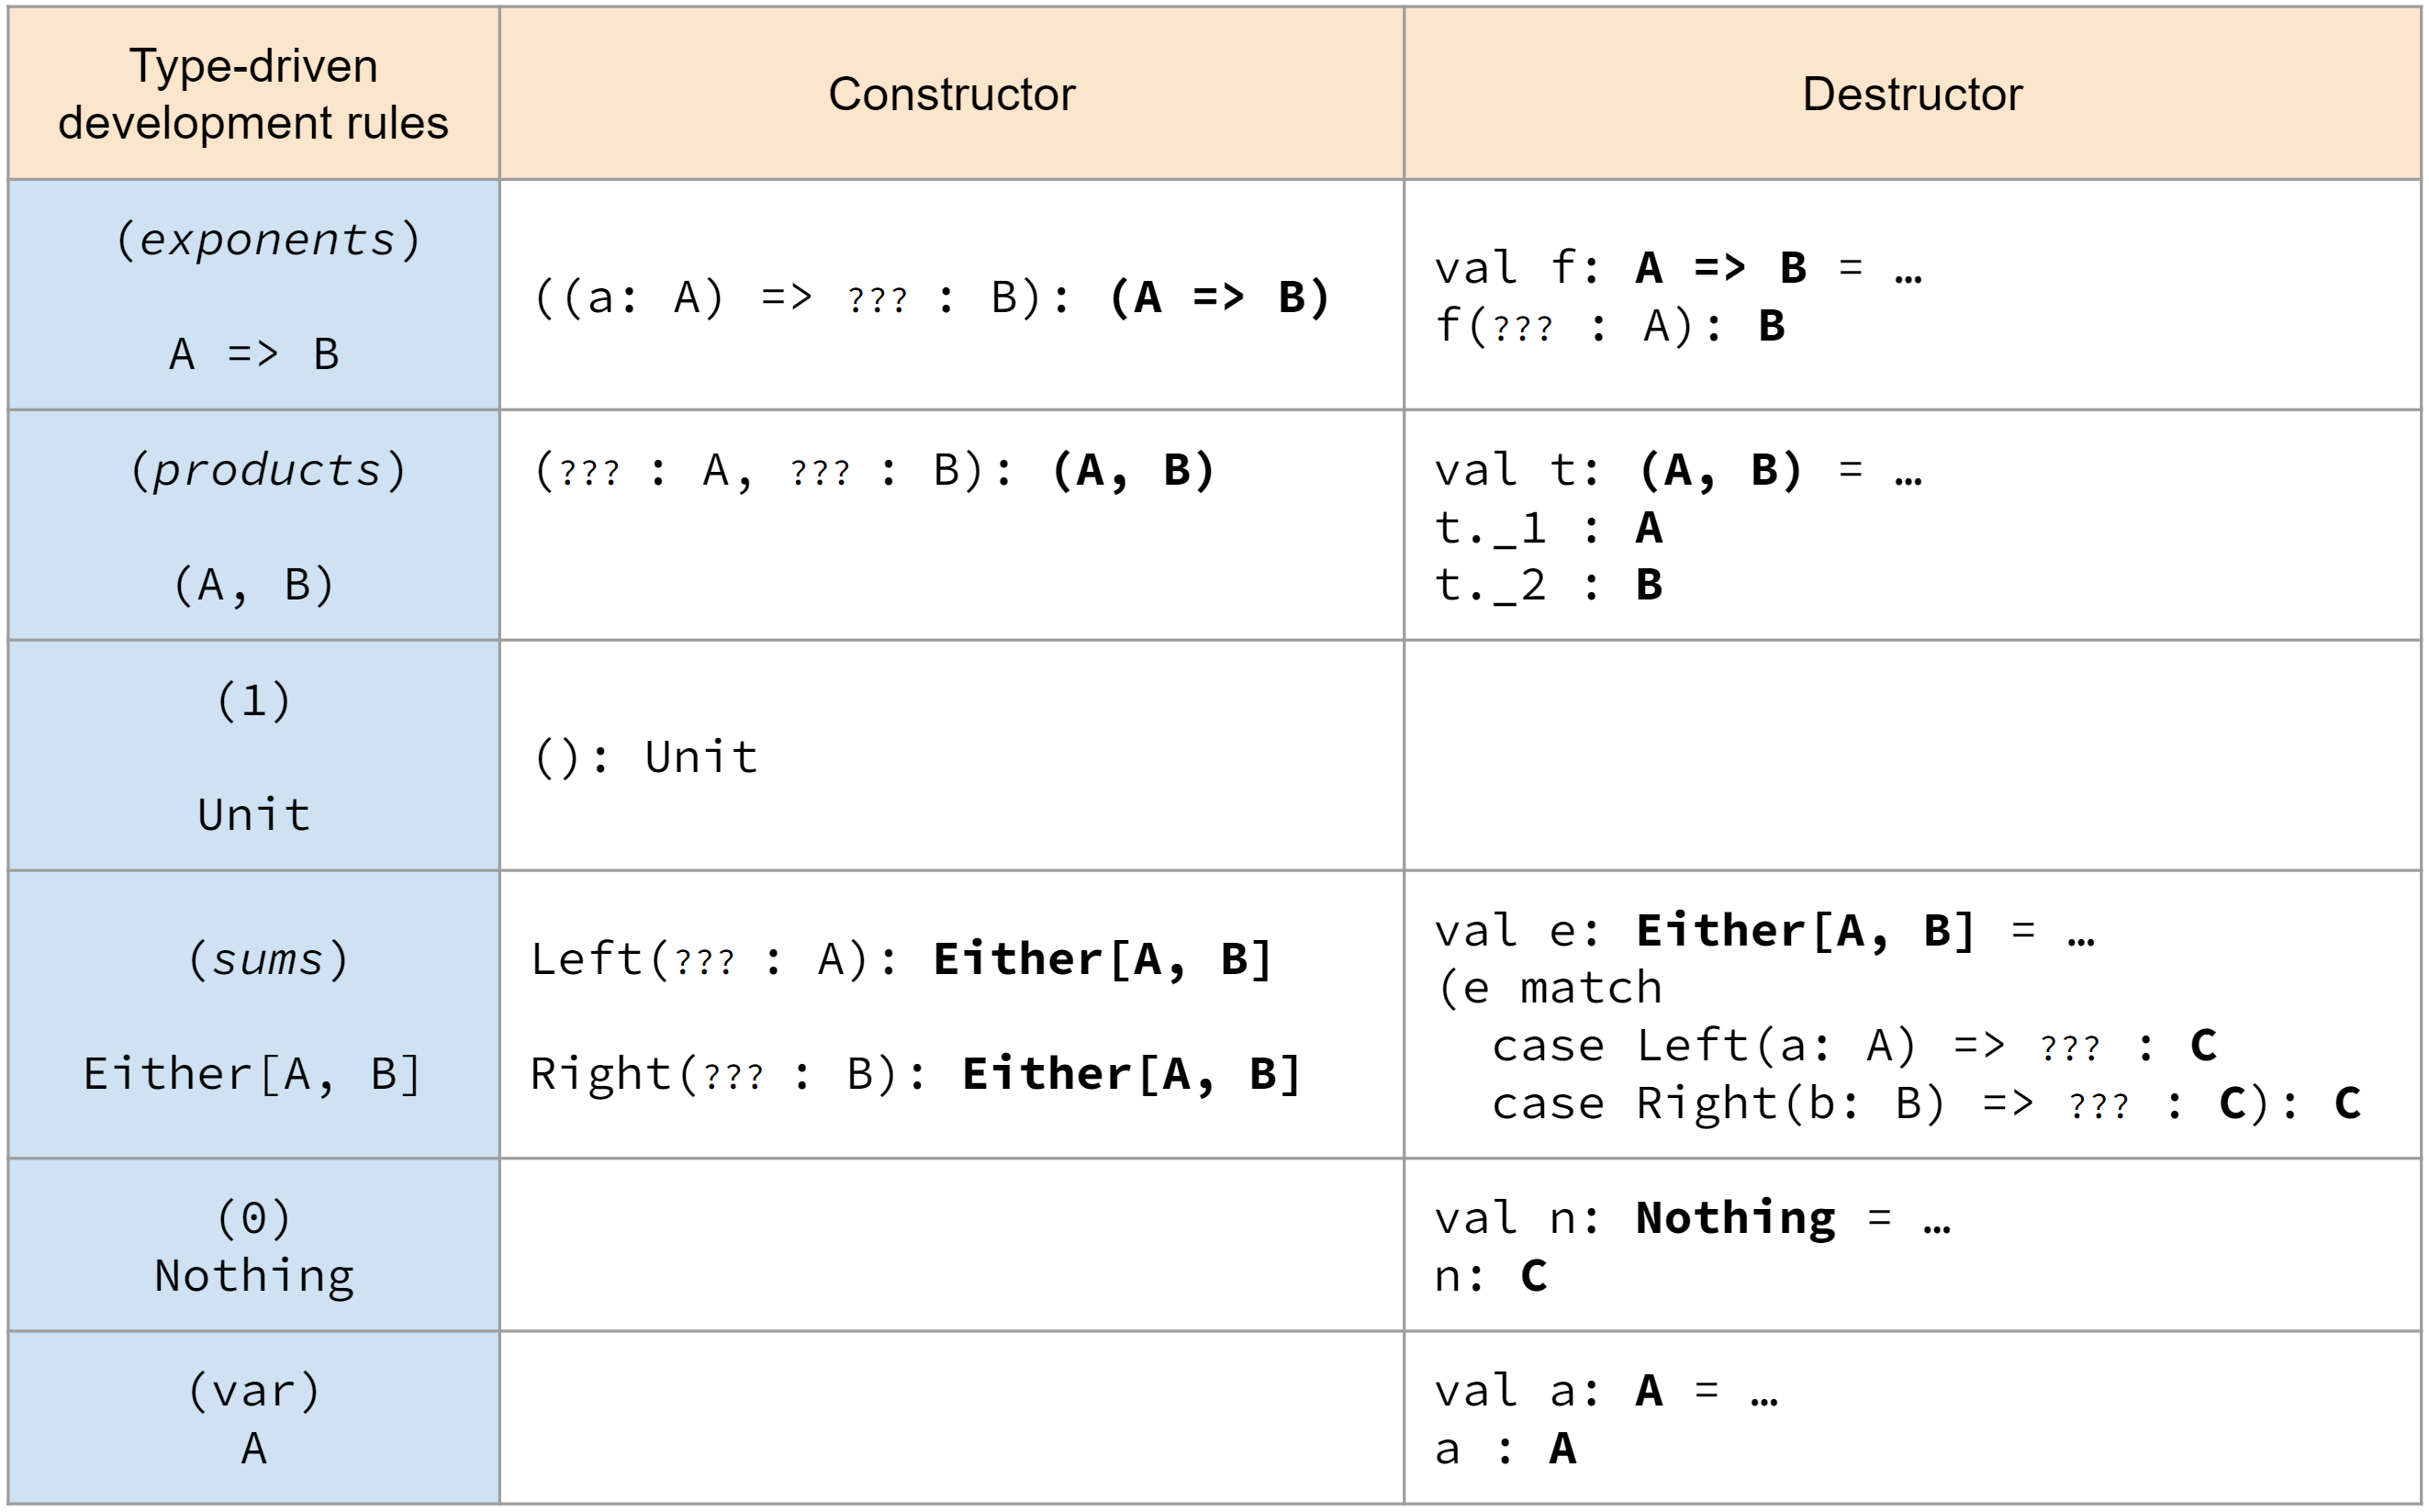

$$ 
\begin{array}{cc}
\mathrm{\bf Scala\ ADTs} & \mathrm{\bf Logic} \\
\hline
\mathtt{Unit} & \top \\
\mathtt{Nothing} & \bot \\
\mathtt{Either[P, Q]} & p \vee q \\
\mathtt{(P, Q)} & p \wedge q \\
\mathtt{P => Q} & p \rightarrow q \\
\mathtt{Not[P]} & \neg p \\
\mathtt{P <=> Q} & p \leftrightarrow q 
\end{array}
$$


In [1]:
type Not[P] = P => Nothing
type <=>[P, Q] = (P => Q, Q => P)

defined type Not
defined type <=>

# Ejercicio 1
__(2 puntos)__

__a) 1 punto__ Utiliza la correspondencia de Curry-Howard para demostrar las siguientes tautologías de la lógica proposicional: 

#### $\vdash p \leftrightarrow p \vee \bot$

In [2]:
// INTRODUCE TU RESPUESTA

def proof[P]: P <=> Either[P, Nothing] = 
    (p => Left(p),
     { case Left(p) => p 
      case Right(n) => n })

defined function proof

#### $\vdash \neg p \vee q \rightarrow (p \rightarrow q)$

In [3]:
// INTRODUCE TU RESPUESTA

def proof[P, Q]: Either[Not[P], Q] => P => Q = {  
    case Left(np) => np // o más explícitamente `case Left(np) => p => np(p)`
    case Right(q) => _ => q
}

defined function proof

__b) (1 punto)__ Utiliza la correspondencia de Curry-Howard para demostrar el siguiente argumento de la lógica clásica proposicional: $\{ p \wedge q \rightarrow r, \neg(p \vee r) \rightarrow s, p\rightarrow q\} \vdash \neg s \rightarrow r$. Para ello, utiliza como premisa adicional la ley de la doble negación aplicada a la proposición $p \vee r$, es decir, demuestra la validez intuicionista del siguiente argumento lógico: $\{\neg\neg(p\vee r) \rightarrow p \vee r, p \wedge q \rightarrow r, \neg(p \vee r) \rightarrow s, p\rightarrow q\} \vdash \neg s \rightarrow r$

In [5]:
def proof[P, Q, R, S](DN: Not[Not[Either[P, R]]] => Either[P, R])(
    p1: ((P, Q)) => R, 
    p2: Not[Either[P, R]] => S, 
    p3: P => Q): Not[S] => R = 
    (ns: Not[S]) => 
        DN((ne: Not[Either[P, R]]) => ns(p2(ne))) match {
            case Left(p: P) => 
                p1((p, p3(p)))
            case Right(r: R) => 
                r
    }

defined function proof

# Ejercicio 2
__(2 puntos)__

Demuestra que para todo tipo $X$, $Y$ y $Z$ se cumple el siguiente isomorfismo:

<p style="text-align: center;">$Either[Unit => (X, Y), (Z, (X, Either[Nothing, Unit]))] \cong Either[(X, Y), (X, Z)]$</p>

In [ ]:
// INTRODUCE TU RESPUESTA

class Iso[X, Y, Z] extends Isomorphic[
    Either[Unit => (X, Y), (Z, (X, Either[Nothing, Unit]))], 
    Either[(X, Y), (X, Z)]] {

    def from(a: Either[Unit => (X, Y), (Z, (X, Either[Nothing, Unit]))]): Either[(X, Y), (X, Z)] = a match {
        case Left(f) => Left(f(()))
        case Right((z, (x, _))) => Right(x, z)
    }

    def to(b: Either[(X, Y), (X, Z)]): Either[Unit => (X, Y), (Z, (X, Either[Nothing, Unit]))] = b match {
        case Left((x, y)) => Left(_ => (x,y))
        case Right((x, z)) => Right(z, (x, Right(())))
    }
}

# Ejercicio 3
__(3 puntos)__

Se desea implementar una función `pair` que empareja un elemento dado con todos los elementos de una lista. El siguiente test ilustra el comportamiento de la función para elementos de tipo `Int`:

In [2]:
class TestPair(pair: (Int, List[Int]) => List[(Int, Int)])  extends FlatSpec with Matchers{
    
    "pair" should "work" in{
        pair(1, List()) shouldBe List()
        pair(1, List(2)) shouldBe List((1,2))
        pair(1, List(2,3,4)) shouldBe List((1,2),(1,3),(1,4))
        pair(3, List(2,7,1,9)) shouldBe List((3,2),(3,7),(3,1),(3,9))
    }
}

defined class TestPair

__a) (0,5 puntos)__ Implementa la función `pair` mediante recursividad (no final). 

In [3]:
def pair[A, B](e: A, l: List[B]): List[(A, B)] = 
    l match {
        case Nil => Nil
        case h :: t => 
            (e, h) :: pair(e, t)
    }

defined function pair

In [4]:
run(new TestPair(pair))

cmd1$Helper$TestPair:
pair
- should work


__b) (0,5 puntos)__ Implementa la función `pair` mediante recursividad final. 

In [5]:
def pair[A, B](e: A, l: List[B]): List[(A, B)] = {
    
    def step(out: List[(A, B)], aux: List[B]): List[(A, B)] = 
        aux match {
            case Nil => out
            case h :: t => step((e, h) :: out, t)
        }

    step(Nil, l).reverse
}

defined function pair

In [6]:
run(new TestPair(pair))

cmd1$Helper$TestPair:
pair
- should work


__c) (0,5 puntos)__ Implementa la función `pair` mediante la función de orden superior `foldRight`.

In [7]:
def pair[A, B](e: A, l: List[B]): List[(A, B)] = 
    l.foldRight(Nil: List[(A, B)]){ (h, tailSol) => 
        (e, h) :: tailSol
    }

defined function pair

In [8]:
run(new TestPair(pair))

cmd1$Helper$TestPair:
pair
- should work


__d) (0,5 puntos)__ Implementa la función `pair` mediante la función de orden superior `foldLeft`.

In [9]:
def pair[A, B](e: A, l: List[B]): List[(A, B)] = 
    l.foldLeft(Nil: List[(A, B)]){ (acc, e2) => 
        (e, e2) :: acc
    }.reverse

defined function pair

In [10]:
run(new TestPair(pair))

cmd1$Helper$TestPair:
pair
- should work


__e) (0.5 puntos)__ Implementa la función `pair` mediante la función de orden superior `map`.

In [11]:
def pair[A, B](e: A, l: List[B]): List[(A, B)] = 
    l.map(e2 => (e, e2))

defined function pair

In [12]:
run(new TestPair(pair))

cmd1$Helper$TestPair:
pair
- should work


__f) (0.5 puntos)__ Implementa la función `pair` mediante la función de orden superior `flatMap`.

In [14]:
def pair[A, B](e: A, l: List[B]): List[(A, B)] = 
    l.flatMap(e2 => List((e, e2)))

defined function pair

In [15]:
run(new TestPair(pair))

cmd1$Helper$TestPair:
pair
- should work


# Ejercicio 4
__(3 puntos)__

Se desea implementar una función que calcula las combinaciones sin repetición de los elementos de una lista, tomados de dos en dos. Si la lista tiene menos de dos elementos, se devolverá la lista vacía. El comportamiento de la función está ilustrado por los siguiente tests: 

In [16]:
class TestCombinaciones2(combinaciones2: List[Char] => List[(Char, Char)])  
extends FlatSpec with Matchers{
    
    "combinaciones" should "work" in {
        combinaciones2(List()) shouldBe List()
        combinaciones2(List('a')) shouldBe List()
        combinaciones2(List('a','b','c','d','e')) shouldBe 
            List(('a','b'),('a','c'),('a','d'),('a','e'),
                       ('b','c'),('b','d'),('b','e'),
                             ('c','d'),('c','e'),
                                   ('d','e'))
    }
}

defined class TestCombinaciones2

__a) (1,5 puntos)__ Implementa la función `combinaciones2` mediante una función recursiva. Para ello se deberá utilizar la función `pair` descrita en el ejercicio 3.

In [17]:
def combinaciones2[A](l: List[A]): List[(A, A)] =
    l match {
        case Nil => Nil
        case head :: tail =>
            pair(head, tail) ++ combinaciones2(tail)
    }

defined function combinaciones2

In [18]:
run(new TestCombinaciones2(combinaciones2))

cmd15$Helper$TestCombinaciones2:
combinaciones
- should work


__b) (1,5 puntos)__ Se desea implementar la función `combinaciones2` de una forma más declarativa con la ayuda de la función `map2`. Esta función de orden superior recibe dos listas y aplica una función binaria a cada uno de los pares de elementos que se encuentran en la misma posición de ambas listas. Su implementación es la siguiente:

In [2]:
def map2[A, B, C](as: List[A], bs: List[B])(f: (A, B) => C): List[C] = (as, bs) match {
    case (a :: as, b :: bs) => f(a, b) :: map2(as, bs)(f)
    case _ => Nil
}

defined function map2

In [3]:
map2(List(1,2,3), List(1,2,3))((a, b) => a*b)

res3: List[Int] = List(1, 4, 9)

Por ejemplo, la función `map2` permite sumar dos listas de enteros de la siguiente forma: 

In [20]:
map2(List(1,2,3), List(1,2,3))(_+_)

res19: List[Int] = List(2, 4, 6)

Para implementar la función `combinaciones2` mediante la función `map2` se deberá seguir el algoritmo ilustrado en el siguiente gráfico: 

<div>
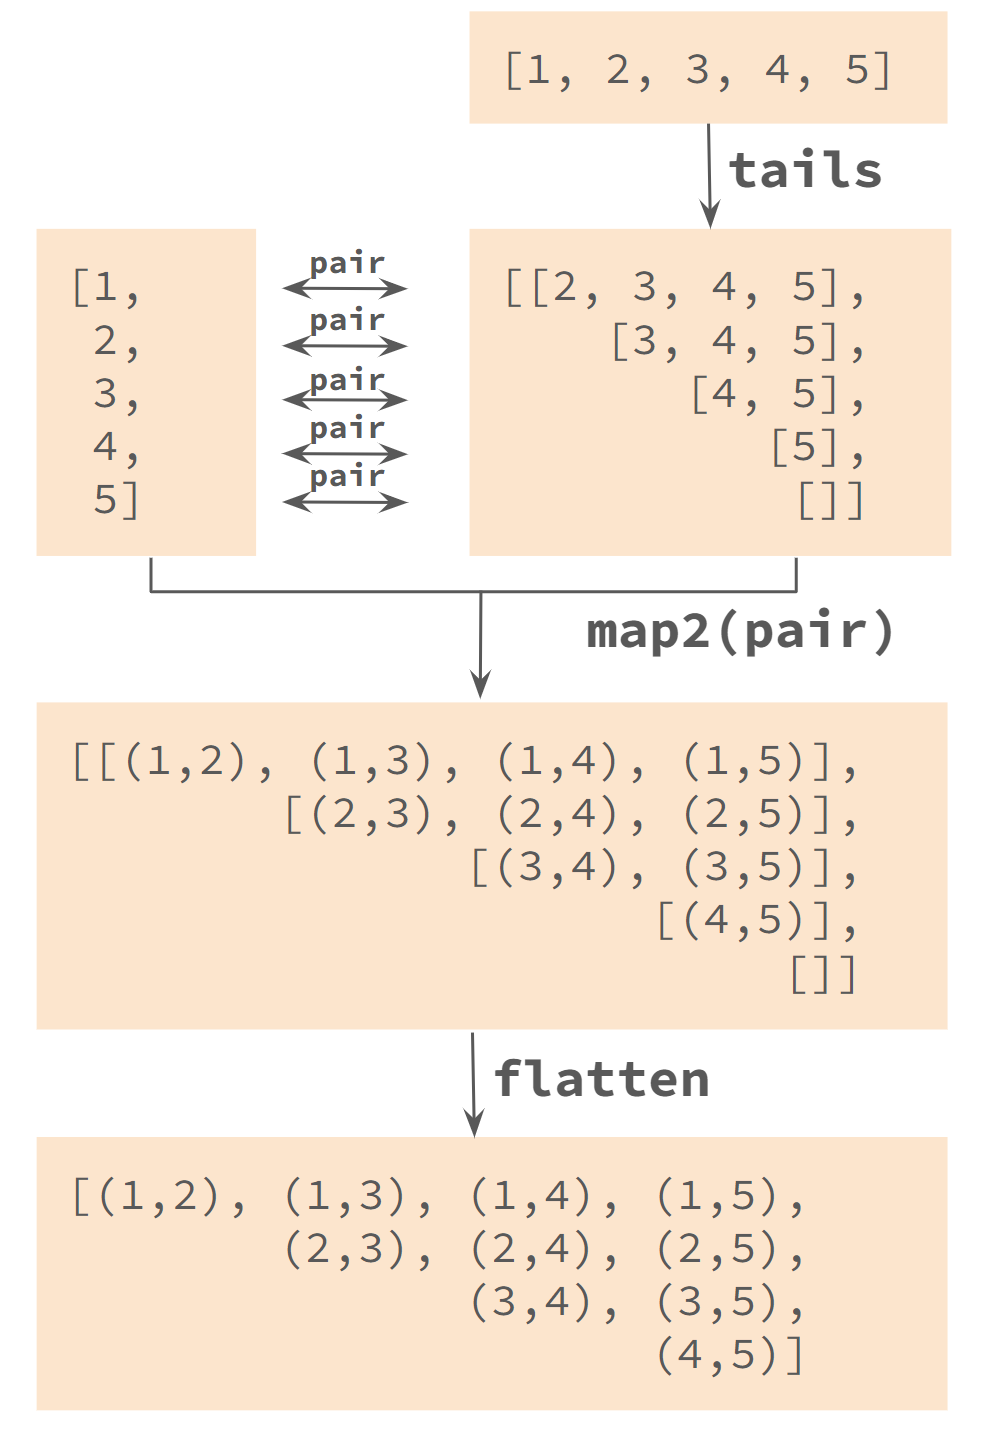
</div>


De acuerdo con este algoritmo, en primer lugar se obtienen los restos de la lista de entrada mediante la función `tails` (incluida en el anexo de este enunciado); a continuación se aplica la función `pair` (explicada en el ejercicio 3) a cada elemento con su resto correspondiente mediante la función `map2`; por último, se concatenan las listas de pares resultantes con la función `flatten`.

Se pide implementar la función `combinaciones2` haciendo uso de las funciones `map2`, `pair`, `tails` y `flatten`. Se recuerda que la función `flatten` permite concatenar todas las listas de una lista de listas. Por ejemplo: `List(List(1,2), List(3), List()).flatten == List(1,2,3)`.

In [24]:
def combinaciones2[A](l: List[A]): List[(A, A)] = 
    map2(l, tails(l))(pair).flatten

defined function combinaciones2

In [25]:
run(new TestCombinaciones2(combinaciones2))

cmd15$Helper$TestCombinaciones2:
combinaciones
- should work
